In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

In [2]:
# Load the dataset
dataset_path = './dataset.tsv'
df = pd.read_csv(dataset_path, sep='\t')

# Filter for 'amitheasshole' area and all other areas
df_aita = df[df['area'] == 'amitheasshole']
df_others = df[df['area'] != 'amitheasshole']

In [3]:
# Define a function to normalize text which includes
# converting to lowercase, stripping whitespaces, and contracting phrases.
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Strip whitespaces
    text = text.strip()
    # Replace "it is" with "it's"
    text = re.sub(r"\bit is\b", "it's", text)
    # Replace "you are" with "you're", etc.
    text = re.sub(r"\byou are\b", "you're", text)
    text = re.sub(r"\bdo not\b", "don't", text)
    text = re.sub(r"\bdoes not\b", "doesn't", text)
    text = re.sub(r"\bdid not\b", "didn't", text)
    # Remove non-alphanumeric characters (except apostrophes and spaces)
    text = re.sub(r"[^\w\s']", '', text)
    return text

In [4]:
# Function to plot a pie chart for a given column
def plot_pie_chart(data, column, title):
    plt.figure(figsize=(8, 8))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.ylabel('')
    plt.show()

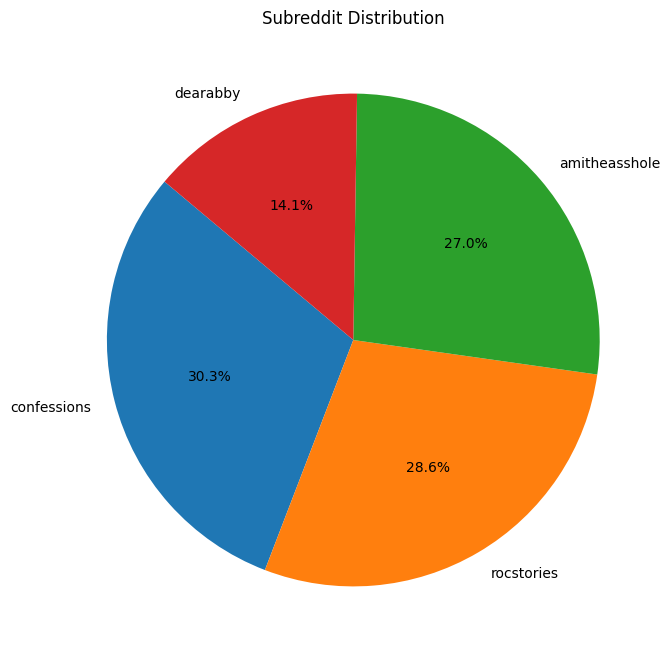

In [5]:
# Subreddit distribution as a pie chart with name and percentage
subreddit_counts = df['area'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
subreddit_counts.plot(kind='pie', labels=subreddit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Subreddit Distribution')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

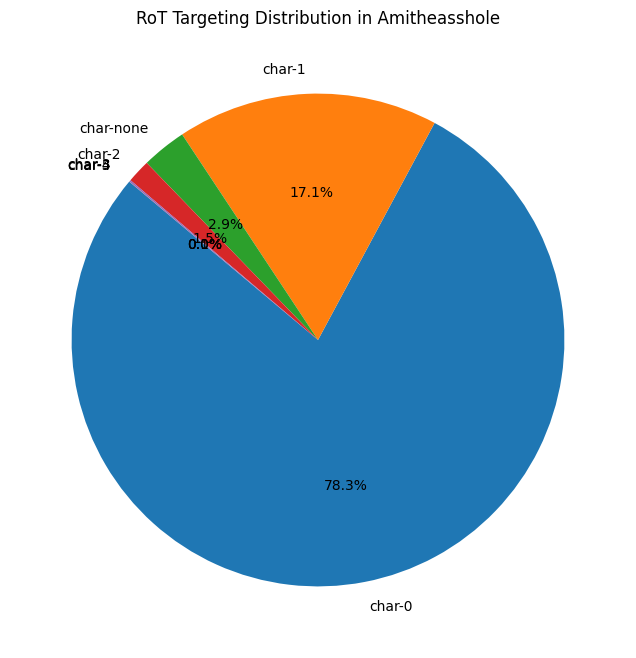

In [6]:
# Plot the RoT targeting as a pie chart in Amitheasshole section
plot_pie_chart(df_aita, 'rot-char-targeting', 'RoT Targeting Distribution in Amitheasshole')

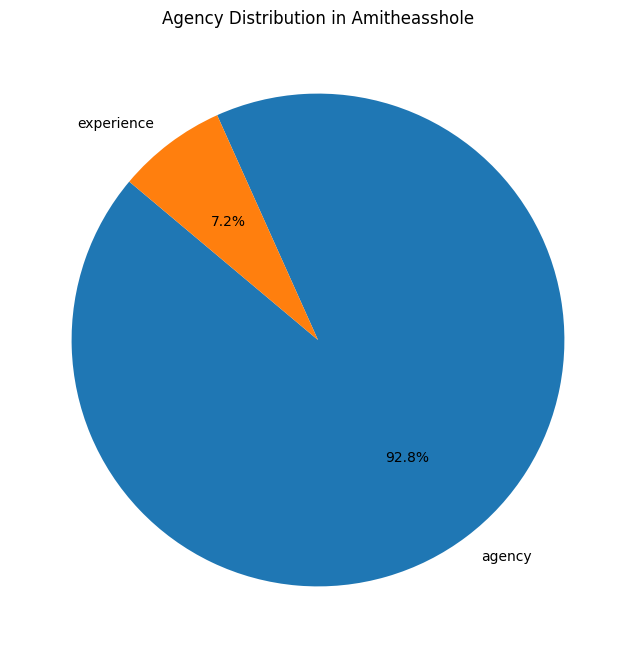

In [7]:
# Plot the Agency as a pie chart in Amitheasshole
plot_pie_chart(df_aita, 'action-agency', 'Agency Distribution in Amitheasshole')

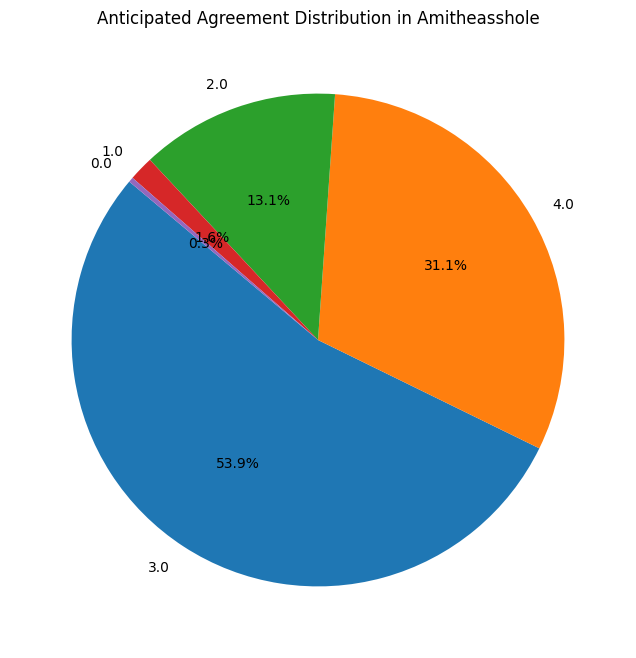

In [8]:
# Plot the anticipated agreement as a pie chart in Amitheasshole
plot_pie_chart(df_aita, 'action-agree', 'Anticipated Agreement Distribution in Amitheasshole')

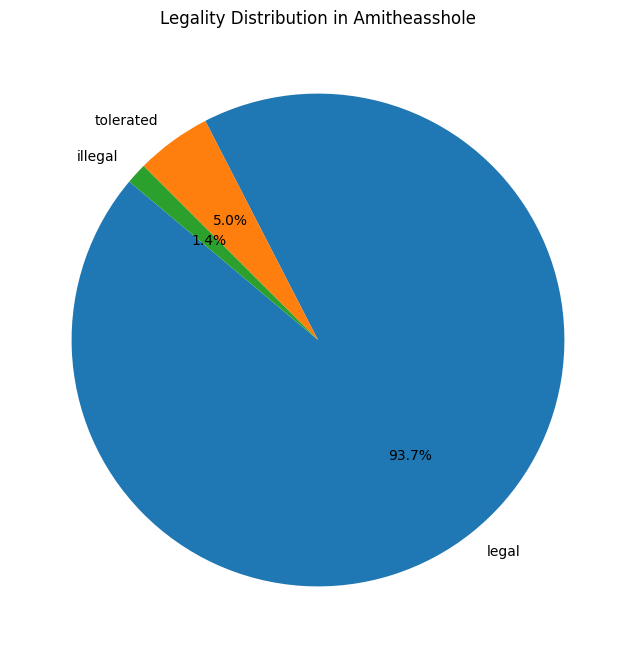

In [9]:
# Plot the legality as a pie chart in Amitheasshole
plot_pie_chart(df_aita, 'action-legal', 'Legality Distribution in Amitheasshole')

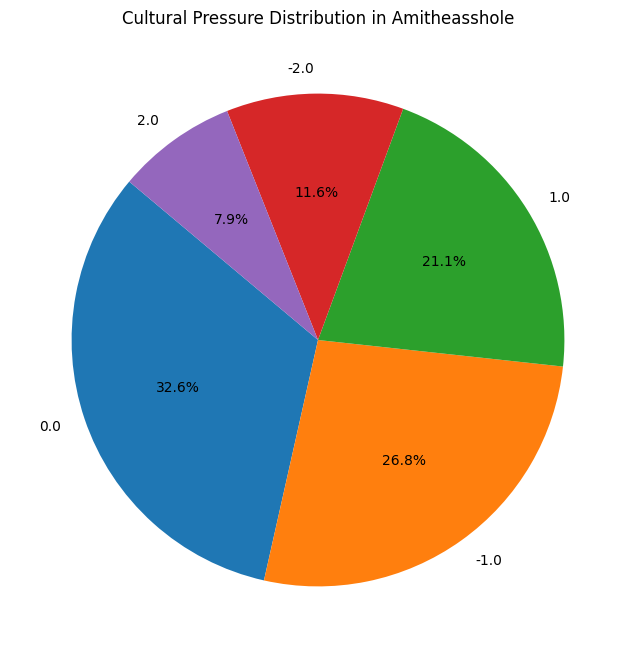

In [10]:
# Plot the cultural pressure as a pie chart in Amitheasshole
plot_pie_chart(df_aita, 'action-pressure', 'Cultural Pressure Distribution in Amitheasshole')

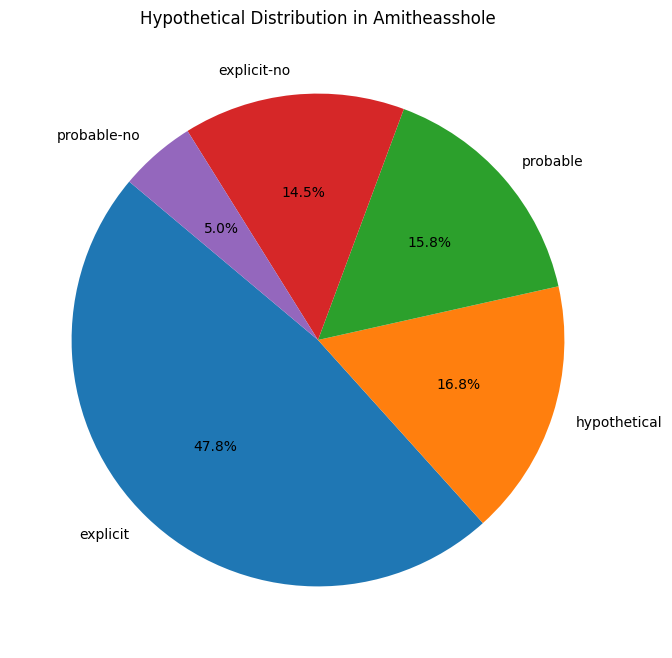

In [11]:
# Plot the Hypothetical as a pie chart in Amitheasshole
plot_pie_chart(df_aita, 'action-hypothetical', 'Hypothetical Distribution in Amitheasshole')

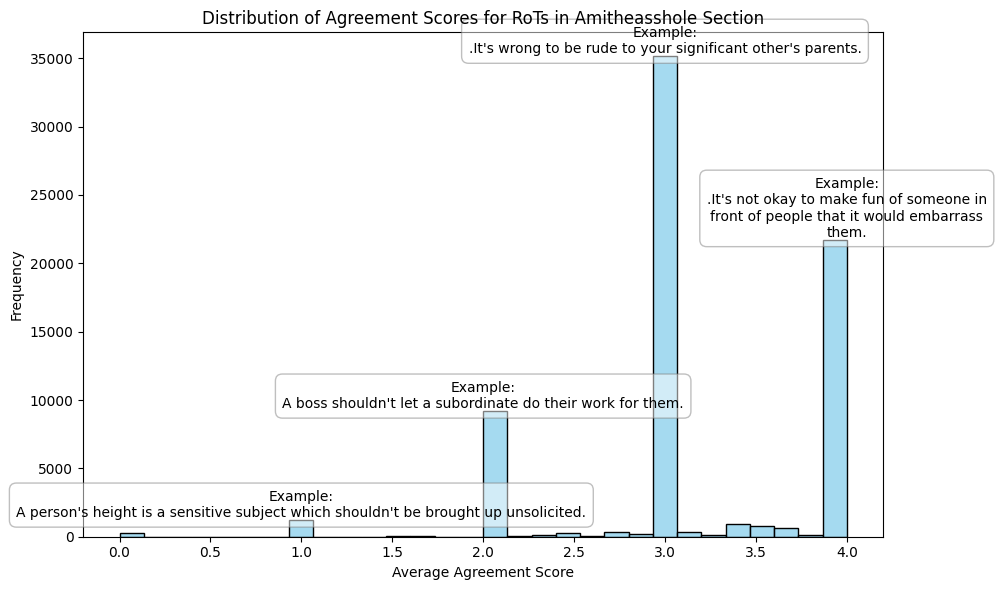

In [12]:
# Calculate the mean agreement score for each RoT

rot_agreement = df_aita.groupby('rot')['rot-agree'].mean().reset_index()

# Plot the distribution and save the figure to retrieve the patches (bars) later
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(rot_agreement['rot-agree'], bins=30, kde=False, color='skyblue')

# Get the heights and edges of the histogram bars
bars = hist_plot.patches
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]

# Define a function to create text boxes
def add_text_box(ax, x, y, text):
    ax.text(x, y, text,
            ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='gray', alpha=0.5),
            wrap=True)

# Find the bars and annotate the examples for scores 1.0, 2.0, 3.0, and 4.0
for score in [1.0, 2.0, 3.0, 4.0]:
    # Find the closest bar center to the score and its height
    closest_bar = min(bars, key=lambda bar: abs((bar.get_x() + bar.get_width() / 2) - score))
    bar_height = closest_bar.get_height()
    
    # Select an example RoT with the closest agreement score (ignoring NA values)
    example_rot = rot_agreement.iloc[(rot_agreement['rot-agree'] - score).abs().dropna().idxmin()]

    # Place the text box just above the bar
    add_text_box(plt.gca(), score, bar_height, f'Example:\n{example_rot["rot"]}')

plt.title('Distribution of Agreement Scores for RoTs in Amitheasshole Section')
plt.xlabel('Average Agreement Score')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to fit the plot and annotations
plt.show()

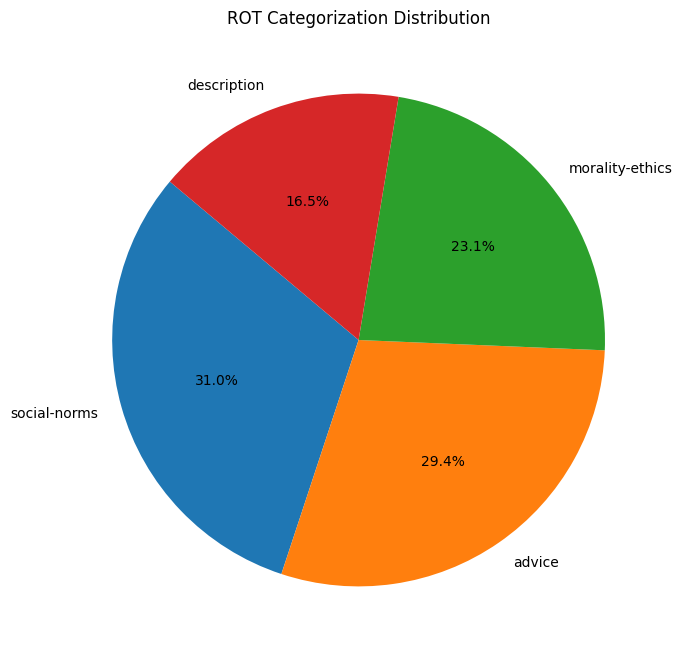

In [13]:
# al ROT-categorization Distribution

# Split the 'rot-categorization' entries and stack them into a single Series
rot_categorization_split = df['rot-categorization'].str.split('|').explode()

# Calculate value counts for each categorization
rot_categorization_counts = rot_categorization_split.value_counts()

# Plotting the ROT Categorization Distribution as a pie chart
plt.figure(figsize=(8, 8))
rot_categorization_counts.plot(kind='pie', labels=rot_categorization_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ROT Categorization Distribution')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

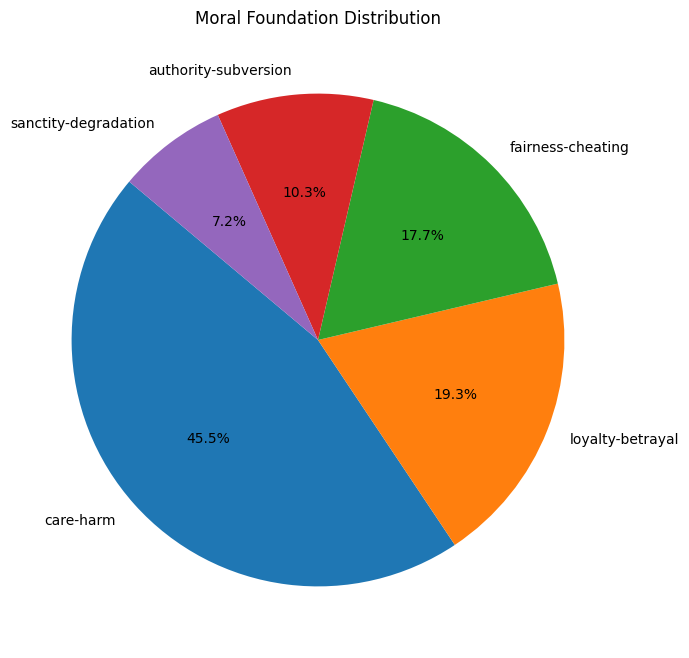

In [14]:
# Moral Foundation Distribution
moral_foundation_counts = df['rot-moral-foundations'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
moral_foundation_counts.plot(kind='pie', labels=moral_foundation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Moral Foundation Distribution')
plt.ylabel('')
plt.show()

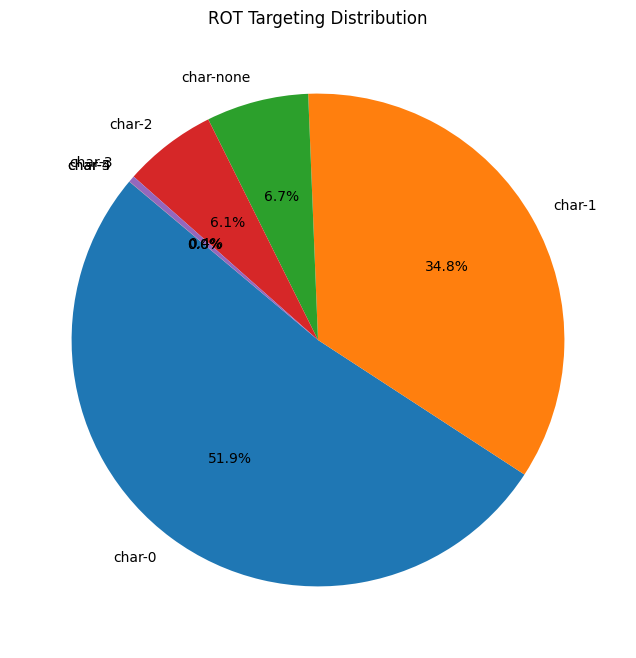

In [15]:
# ROT Targeting Distribution
rot_targeting_counts = df['rot-char-targeting'].value_counts()
plt.figure(figsize=(8, 8))
rot_targeting_counts.plot(kind='pie', labels=rot_targeting_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ROT Targeting Distribution')
plt.ylabel('')
plt.show()

/var/folders/d_/xnywg_9s3l96s65krslhm0hm0000gn/T/ipykernel_36450/2127886779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aita['rot-judgment'] = df_aita['rot-judgment'].astype(str).apply(normalize_text)


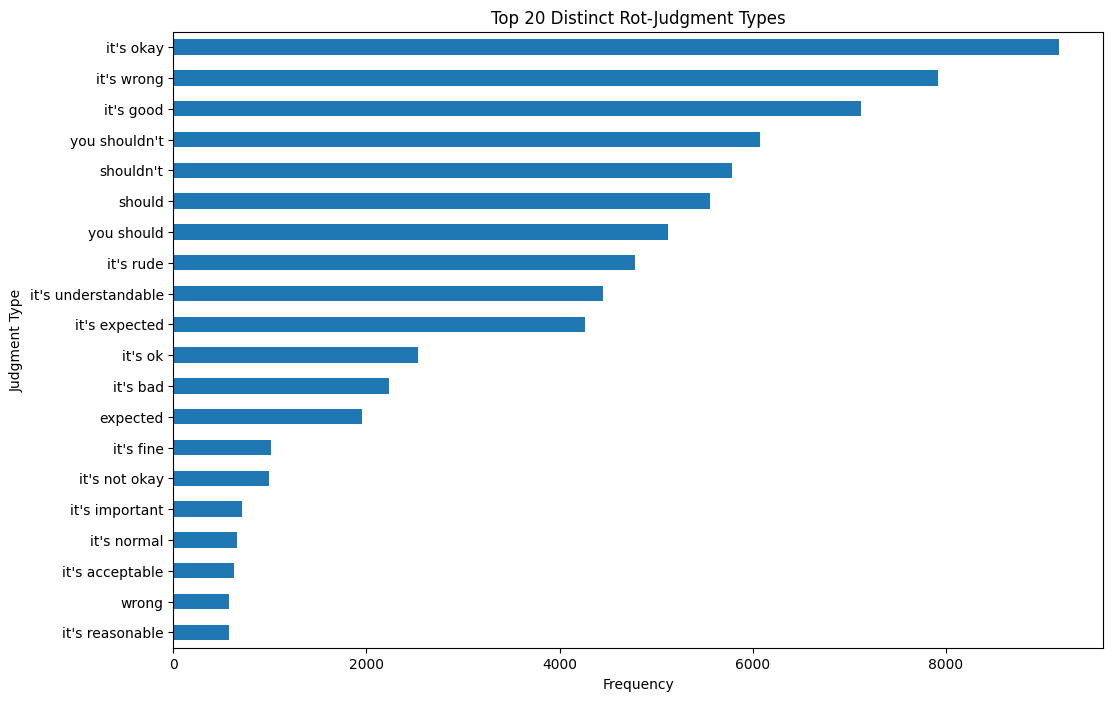

In [16]:
# Plot for Calculating the top 20 most frequent rot-judgment types

# Normalize the 'rot-judgment' column
# Ensure that all entries are strings before applying the normalize_text function
df_aita['rot-judgment'] = df_aita['rot-judgment'].astype(str).apply(normalize_text)

# Filter out any empty or non-informative judgments
# After normalization, non-informative judgments like 'nan' (from NaN) will be filtered out
dataset = df_aita[df_aita['rot-judgment'].str.strip().astype(bool)]

# Recalculate the top 20 most frequent distinct rot-judgment types
rot_judgment_counts_distinct = dataset['rot-judgment'].value_counts().head(20)

# Plot the top 20 distinct rot-judgment types
plt.figure(figsize=(12, 8))
rot_judgment_counts_distinct.plot(kind='barh')
plt.title('Top 20 Distinct Rot-Judgment Types')
plt.xlabel('Frequency')
plt.ylabel('Judgment Type')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()

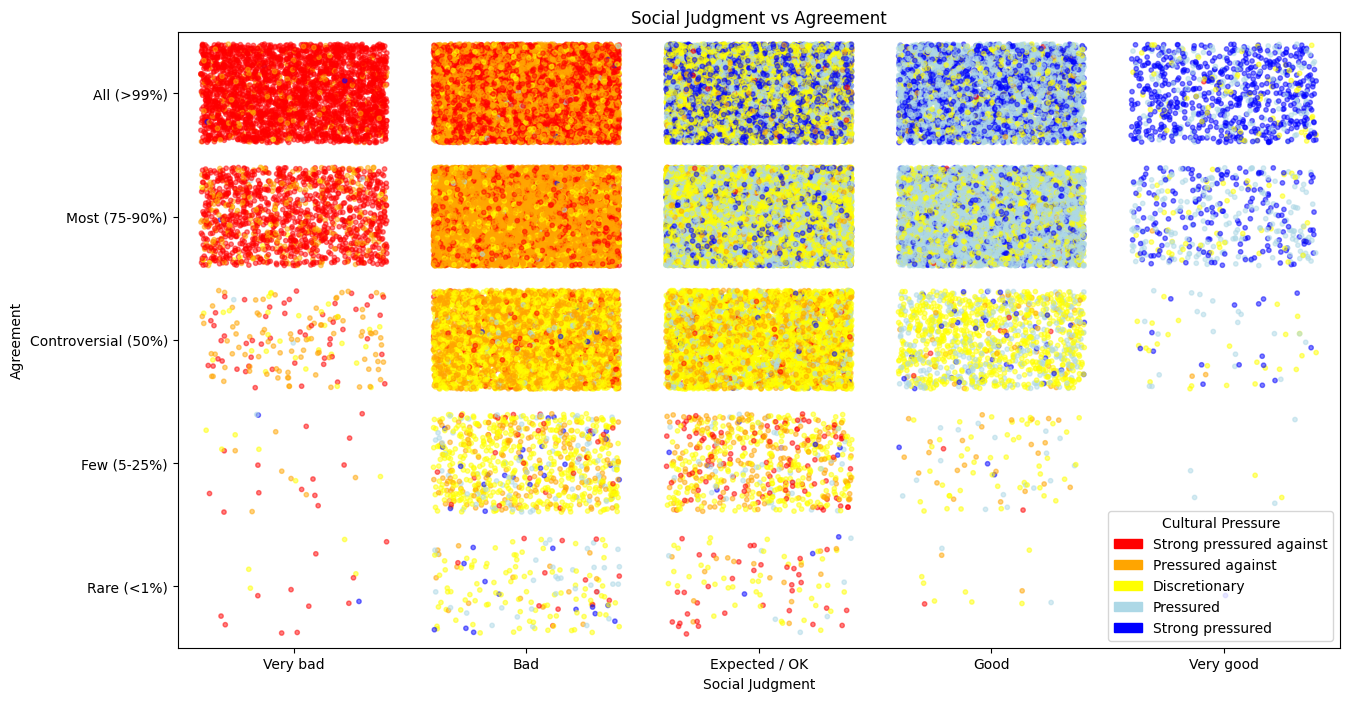

In [17]:
#                           plot Social judgement vs Agreement                               #

# for the general results plot use the whole data:
#       data = pd.read_csv('./dataset.tsv', delimiter='\t')

# Load the dataset for the amitheasshole section only 
dataset_path = './dataset.tsv'
df = pd.read_csv(dataset_path, sep='\t')
data = df[df['area'] == 'amitheasshole']

# Define the mappings
social_judgment_mapping = {
    -2: "Very bad",
    -1: "Bad",
     0: "Expected / OK",
     1: "Good",
     2: "Very good"
}

agreement_mapping = {
    0: "Rare (<1%)",
    1: "Few (5-25%)",
    2: "Controversial (50%)",
    3: "Most (75-90%)",
    4: "All (>99%)"
}

pressure_color_mapping = {
    -2: "red",        # Strong pressure against
    -1: "orange",     # Pressure against
     0: "yellow",     # Discretionary
     1: "lightblue",  # Pressure for
     2: "blue"        # Strong pressure for
}

pressure_color_name_mapping = {
    -2: "Strong pressured against",
    -1: "Pressured against",
     0: "Discretionary",
     1: "Pressured",
     2: "Strong pressured"
}

# Drop rows where action-pressure is NaN (if any)
data = data.dropna(subset=['action-pressure'])

# Now, continue with the color mapping and plotting
data['Color'] = data['action-pressure'].map(pressure_color_mapping)

# Update the DataFrame with the new mapping
data['Social Judgment'] = data['action-moral-judgment'].map(social_judgment_mapping)
data['Agreement'] = data['rot-agree'].map(lambda x: agreement_mapping.get(x, "Unknown"))
data['Color'] = data['action-pressure'].map(pressure_color_mapping)

# Plotting parameters
judgment_categories = ["Very bad", "Bad", "Expected / OK", "Good", "Very good"]
agreement_categories = ["Rare (<1%)", "Few (5-25%)", "Controversial (50%)", "Most (75-90%)", "All (>99%)"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Define jitter function
def jitter(values, category_index, category_count, jitter_strength=0.8):
    jitter_values = jitter_strength * np.random.rand(len(values))
    jittered_positions = category_index + 1 + (jitter_values - jitter_strength / 2)
    return jittered_positions

# Plot each point with jitter 
for j_category in judgment_categories:
    for a_category in agreement_categories:
        subset = data[(data['Social Judgment'] == j_category) & (data['Agreement'] == a_category)]
        x = jitter(subset['action-moral-judgment'], judgment_categories.index(j_category), len(judgment_categories))
        y = jitter(subset['rot-agree'], agreement_categories.index(a_category), len(agreement_categories))
        colors = subset['Color']  # Get the color for each point based on 'action-pressure'
        ax.scatter(x, y, alpha=0.5, s=10, c=colors)

# Set up the axes
ax.set_xticks(np.arange(1, len(judgment_categories) + 1))
ax.set_yticks(np.arange(1, len(agreement_categories) + 1))
ax.set_xticklabels(judgment_categories)
ax.set_yticklabels(agreement_categories)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Expand the limits to create gaps
ax.set_xlim(0.5, len(judgment_categories) + 0.5)
ax.set_ylim(0.5, len(agreement_categories) + 0.5)

# Plot legend for the Cultural Pressure parameters
legend_handles = [mpatches.Patch(color=color, label=pressure_color_name_mapping[num]) for num, color in pressure_color_mapping.items()]
legend = ax.legend(handles=legend_handles, title='Cultural Pressure', loc='lower right', bbox_to_anchor=(1, 0), bbox_transform=ax.transAxes)

# Set labels and title
ax.set_xlabel('Social Judgment')
ax.set_ylabel('Agreement')
ax.set_title('Social Judgment vs Agreement')

# Show the plot with gaps between the categories
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.grid(False)
plt.show()